In [ ]:
import torch
from model import *

In [2]:
model = ChessModel()
with open("results/exp_dev/model_001.pt", "rb") as model_file:
    model.load_state_dict(torch.load(model_file))
model

ChessModel(
  (hidden_layer): Linear(in_features=448, out_features=4096, bias=True)
  (output_layer): Linear(in_features=4096, out_features=4096, bias=True)
)

In [3]:
# load the data
from train import *
positions, valid_moves = load_data()

Loading data...
Loaded data. Shape: 
positions : torch.Size([10000, 7, 8, 8])
moves     : torch.Size([10000, 4096])


In [4]:
import chess
import chess.svg
from chess_utils import action_to_move, move_to_action, board_to_tensor, tensor_to_board

In [142]:
idx = 734

In [143]:
board = positions[idx]
moves = valid_moves[idx]

In [144]:
from visualization import plot_pos_tensor, plot_move_set, plot_board_moves

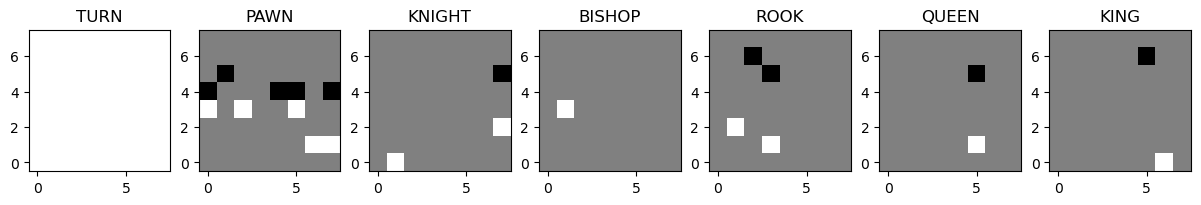

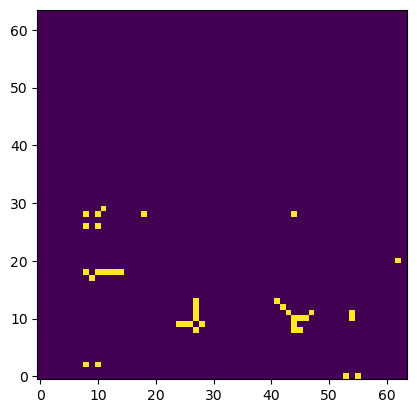

In [145]:
plot_pos_tensor(board)
plot_move_set(moves)

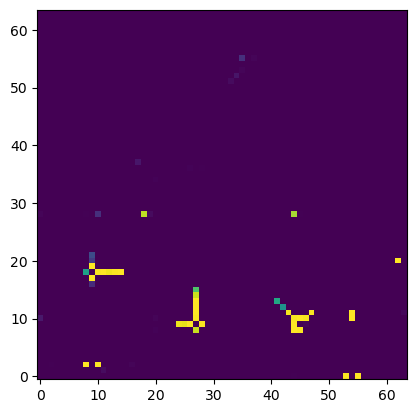

In [146]:
predicted_moves = model(positions[[idx]])[0].detach()
plot_move_set(predicted_moves)

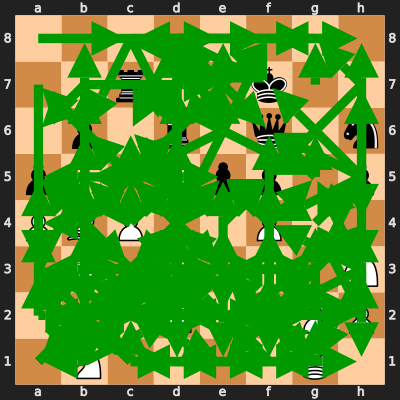

In [147]:
plot_board_moves(tensor_to_board(board), predicted_moves, k=200)

In [148]:
from evaluate import calculate_precision, calculate_recall

In [149]:
calculate_precision(predicted_moves, moves)

0.9210526347160339

In [150]:
predicted_positives = (predicted_moves >= 0.5)
predicted_positives, predicted_positives.sum()

(tensor([False, False, False,  ..., False, False, False]), tensor(38))

In [151]:
true_positives = predicted_positives & moves.bool()
true_positives, true_positives.sum()

(tensor([False, False, False,  ..., False, False, False]), tensor(35))

In [152]:
false_positives = predicted_positives & ~moves.bool()
false_positives, false_positives.sum()

(tensor([False, False, False,  ..., False, False, False]), tensor(3))

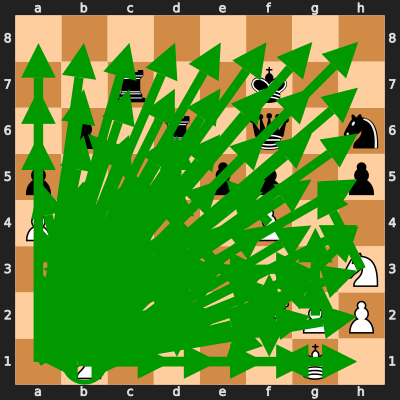

In [153]:
plot_board_moves(tensor_to_board(board), true_positives.float(), k=100)

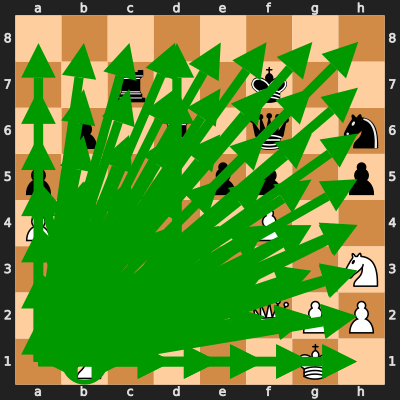

In [154]:
plot_board_moves(tensor_to_board(board), false_positives.float(), k=100)

In [155]:
false_negatives = ~predicted_positives & moves.bool()
false_negatives, false_negatives.sum()

(tensor([False, False, False,  ..., False, False, False]), tensor(5))

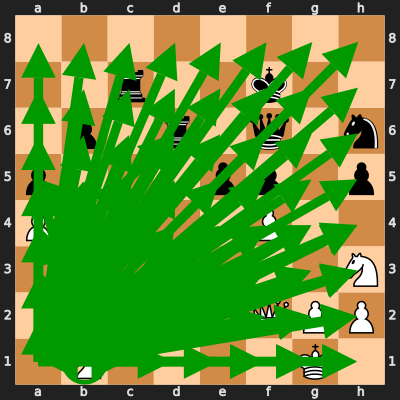

In [156]:
plot_board_moves(tensor_to_board(board), false_negatives.float(), k=100)

In [157]:
calculate_recall(predicted_positives, moves.bool())

0.875

In [158]:
all_predicted_moves = model(positions)
all_predicted_moves.shape

torch.Size([10000, 4096])

In [159]:
valid_moves.shape

torch.Size([10000, 4096])

In [45]:
precisions = []
recalls = []
for i in range(0, 101):
    p = i/100.
    precision = calculate_precision(all_predicted_moves, valid_moves, p)
    recall = calculate_recall(all_predicted_moves, valid_moves.bool(), p)
    precisions.append(precision)
    recalls.append(recall)
    print(f"{p:.2f}\t{precision*100:.2f}\t{recall*100:.2f}")

0.00	0.54	100.00
0.01	81.58	98.82
0.02	88.23	98.60
0.03	91.21	98.45
0.04	92.92	98.33
0.05	94.00	98.23
0.06	94.72	98.15
0.07	95.26	98.07
0.08	95.68	97.99
0.09	95.99	97.92
0.10	96.25	97.86
0.11	96.48	97.80
0.12	96.66	97.73
0.13	96.82	97.68
0.14	96.95	97.63
0.15	97.06	97.57
0.16	97.17	97.51
0.17	97.26	97.45
0.18	97.36	97.40
0.19	97.43	97.36
0.20	97.51	97.31
0.21	97.58	97.26
0.22	97.63	97.23
0.23	97.69	97.18
0.24	97.73	97.14
0.25	97.78	97.09
0.26	97.82	97.05
0.27	97.85	97.00
0.28	97.89	96.96
0.29	97.93	96.93
0.30	97.97	96.89
0.31	98.00	96.85
0.32	98.03	96.81
0.33	98.06	96.77
0.34	98.09	96.73
0.35	98.12	96.69
0.36	98.14	96.66
0.37	98.16	96.61
0.38	98.18	96.57
0.39	98.21	96.53
0.40	98.23	96.48
0.41	98.25	96.44
0.42	98.27	96.39
0.43	98.29	96.35
0.44	98.31	96.31
0.45	98.33	96.26
0.46	98.35	96.21
0.47	98.37	96.17
0.48	98.39	96.12
0.49	98.41	96.07
0.50	98.43	96.03
0.51	98.44	95.97
0.52	98.46	95.93
0.53	98.48	95.88
0.54	98.49	95.82
0.55	98.51	95.77
0.56	98.53	95.72
0.57	98.55	95.67
0.58	98.56	95.

In [46]:
from matplotlib import pyplot as plt

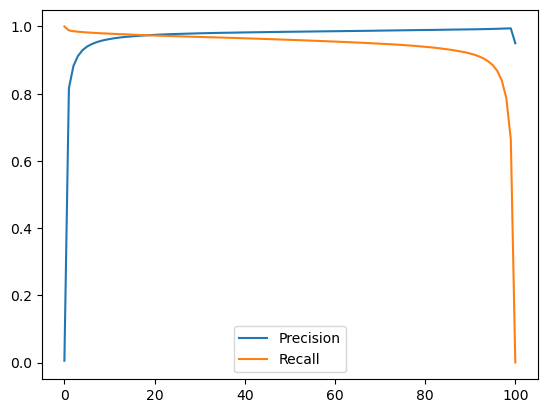

In [47]:
plt.plot(list(zip(precisions, recalls)))
plt.legend(['Precision', 'Recall'])

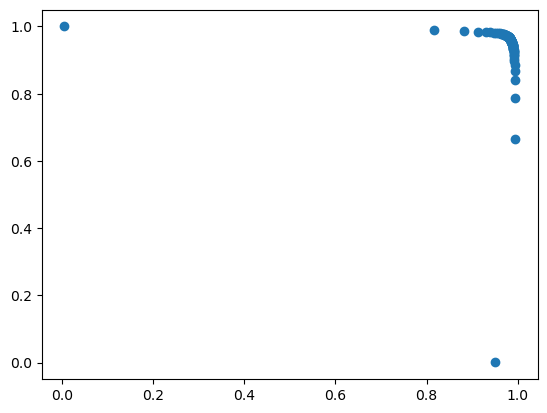

In [26]:
plt.scatter(precisions, recalls)